In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import DataFrame
import random
import pandas as pd
import numpy as np

In [7]:
import numpy as np
from pandas import DataFrame, MultiIndex, concat, DatetimeIndex, Series
from math import sqrt
from scipy.stats import t, pearsonr, spearmanr
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from pca import pca
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

from matplotlib import pyplot as plt
import seaborn as sb
import sys

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from tabulate import tabulate

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_excel("ÎπöÏ∂îÍ∞ÄÎßàÏßÄÎßâ.xlsx")
df.head()

Unnamed: 0     gen  age religion   edu  sm_year sm_state  sm_day  \
0           0  female   78      yes    Ï§ëÏ°∏      NaN       no     NaN   
1           1    male   75       no  Ï¥àÏ°∏Ïù¥Ìïò      NaN       no     NaN   
2           2    male   81      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN   
3           3    male   61      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN   
4           4  female   60      yes    Í≥†Ï°∏      NaN       no     NaN   

  dr_mean_year dr_6cup  ... preg_experience health_state disabled  work_state  \
0      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÏóÜÎã§            2    abled      nowork   
1      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÎÇ®ÏÑ±            1    abled        work   
2      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÎÇ®ÏÑ±            4    abled        work   
3      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÎÇ®ÏÑ±            4    abled        work   
4      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÏóÜÎã§            4    abled        work   

  work_code region  income y_total     debt  y_train  
0       NaN   city   405.0      20  10350.0        0  
1     942.0   city  2788.0      29      0.0        1  
2     762.0   city  2304.0      18  21220.0        0  
3     855.0   city  5231.0      20      0.0        0  
4     399.0   city  5231.0      21      0.0        0  

[5 rows x 22 columns]

### Îß® Î®ºÏ†Ä Ìï¥ÏïºÌïòÎäî Í±¥ Îã§Î•∏ Î≥ÄÏàò Îì§ Ï§ë ÏÜåÎìù Î∞è ÎπöÏóê Îî∞Î•∏ Ïö∞Ïö∏Í∞ê Ï∞®Ïù¥Î•º Î≥ºÍ±∞Í∏∞ ÎñÑÎ¨∏Ïóê ÏÜåÎìùÍ≥º ÎπöÏù¥ ÏûàÎäî ÏÇ¨ÎûåÎì§Î°ú Í∏∞Ï§ÄÏùÑ Ïû°ÏïÑÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨ Î∞è Î∂ÑÏÑùÌï† Í≤ÉÏûÑ

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13474 non-null  int64  
 1   gen              13474 non-null  object 
 2   age              13474 non-null  int64  
 3   religion         13474 non-null  object 
 4   edu              13474 non-null  object 
 5   sm_year          1119 non-null   float64
 6   sm_state         13474 non-null  object 
 7   sm_day           2036 non-null   float64
 8   dr_mean_year     13474 non-null  object 
 9   dr_6cup          5711 non-null   object 
 10  dr_hurt          5711 non-null   object 
 11  dr_worry         5711 non-null   object 
 12  preg_experience  13474 non-null  object 
 13  health_state     13474 non-null  int64  
 14  disabled         13474 non-null  object 
 15  work_state       13474 non-null  object 
 16  work_code        8058 non-null   float64
 17  region      

In [6]:
df= df.loc[(df['income']>0)&(df['debt']>0),:]
df = df.iloc[:,1:]

In [7]:
df

gen  age religion   edu  sm_year sm_state  sm_day dr_mean_year  \
0      female   78      yes    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   
2        male   81      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   
8      female   53      yes    Í≥†Ï°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   
9      female   31       no    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   
13       male   45       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN      yes    14.0        Ïõî2~3Ìöå   
...       ...  ...      ...   ...      ...      ...     ...          ...   
13469    male   47       no  ÎåÄÏ°∏Ïù¥ÏÉÅ     25.0      yes    10.0        Ï£º2~3Ìöå   
13470  female   46       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN        Ï£º2~3Ìöå   
13471    male   48       no  ÎåÄÏ°∏Ïù¥ÏÉÅ     25.0      yes     7.0      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   
13472    male   59      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ     32.0       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   
13473  female   59      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå   

      dr_6cup dr_hurt  ... preg_experience health_state  disabled work_state  \
0         NaN     NaN  ...              ÏóÜÎã§            2     abled     nowork   
2         NaN     NaN  ...              ÎÇ®ÏÑ±            4     abled       work   
8         NaN     NaN  ...              ÏóÜÎã§            2     abled       work   
9         NaN     NaN  ...              ÏóÜÎã§            2     abled     nowork   
13        Ïó∞1Ìöå      Ï†ÑÌòÄ  ...              ÎÇ®ÏÑ±            4     abled       work   
...       ...     ...  ...             ...          ...       ...        ...   
13469     Ï£º1Ìöå      Ï†ÑÌòÄ  ...              ÎÇ®ÏÑ±            4     abled       work   
13470     Ïó∞1Ìöå      Ï†ÑÌòÄ  ...              ÏóÜÎã§            4     abled     nowork   
13471     NaN     NaN  ...              ÎÇ®ÏÑ±            4     abled       work   
13472     NaN     NaN  ...              ÎÇ®ÏÑ±            4     abled       work   
13473     NaN     NaN  ...              ÏóÜÎã§            4     abled     nowork   

      work_code  region  income  y_total     debt  y_train  
0           NaN    city   405.0       20  10350.0        0  
2         762.0    city  2304.0       18  21220.0        0  
8         151.0    city  2290.8       21   1020.0        0  
9           NaN    city  2290.8       17   1020.0        0  
13        399.0    city  5958.0       20  12921.0        0  
...         ...     ...     ...      ...      ...      ...  
13469     151.0    city  8548.0       17  26014.0        0  
13470       NaN    city  8548.0       17  26014.0        0  
13471     222.0    city  8452.0       17  12360.0        0  
13472     248.0    city  7094.0       18   1902.0        0  
13473       NaN    city  7094.0       17   1902.0        0  

[5414 rows x 21 columns]

## Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 
### Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨

In [8]:
df.describe()

age     sm_year       sm_day  health_state    work_code  \
count  5414.000000  383.000000  1048.000000   5414.000000  3801.000000   
mean     51.013668   24.856397    14.953244      3.648134   546.257564   
std      16.726448   14.922584     7.538168      0.861421   270.564329   
min      17.000000    0.000000     1.000000      1.000000   111.000000   
25%      39.000000   11.500000    10.000000      3.000000   312.000000   
50%      50.000000   25.000000    15.000000      4.000000   510.000000   
75%      63.000000   35.000000    20.000000      4.000000   842.000000   
max     101.000000   68.000000    50.000000      5.000000  1009.000000   

             income      y_total           debt      y_train  
count   5414.000000  5414.000000    5414.000000  5414.000000  
mean    6628.044847    18.580901   10158.879405     0.095308  
std     3995.165853     2.982555   13604.478757     0.293668  
min        1.000000    11.000000       3.000000     0.000000  
25%     3851.500000    17.000000    2096.000000     0.000000  
50%     6113.500000    17.000000    6200.000000     0.000000  
75%     8556.000000    19.000000   13000.000000     0.000000  
max    65676.000000    38.000000  256400.000000     1.000000

<Axes: xlabel='sm_day', ylabel='y_total'>

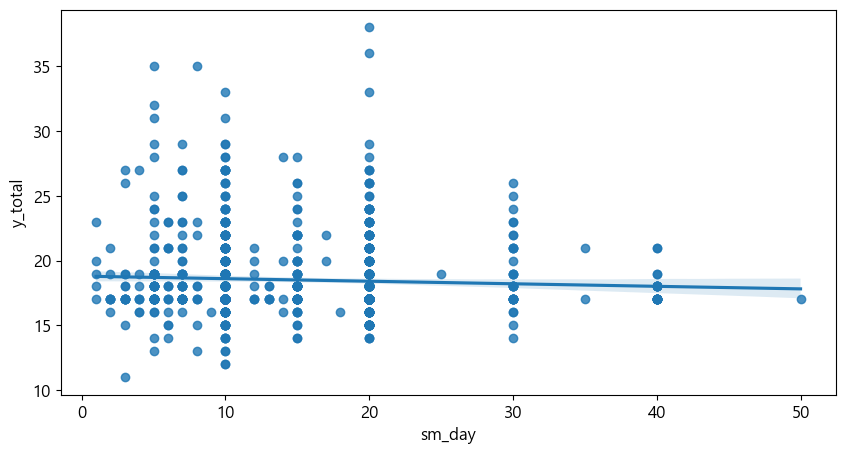

In [9]:
sns.regplot(data=df,x='sm_day',y='y_total')

<Axes: xlabel='sm_year', ylabel='y_total'>

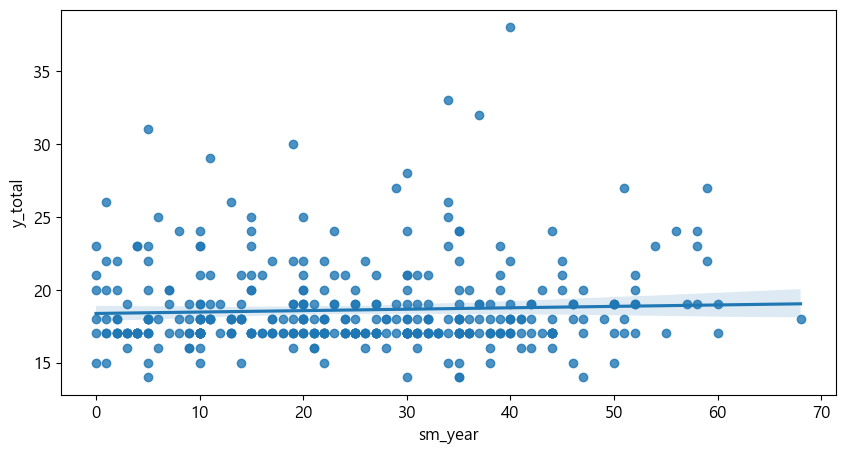

In [10]:
sns.regplot(data=df,x='sm_year',y='y_total')

<Axes: xlabel='income', ylabel='y_total'>

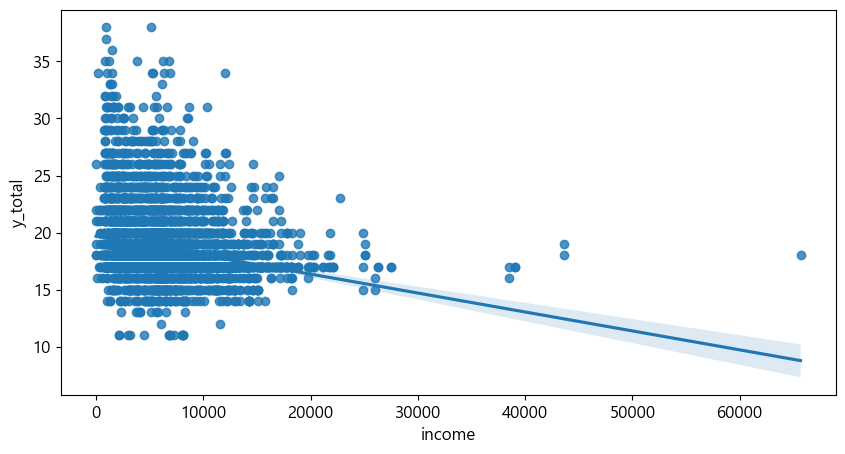

In [11]:
sns.regplot(data=df,x='income',y='y_total')

<Axes: xlabel='debt', ylabel='y_total'>

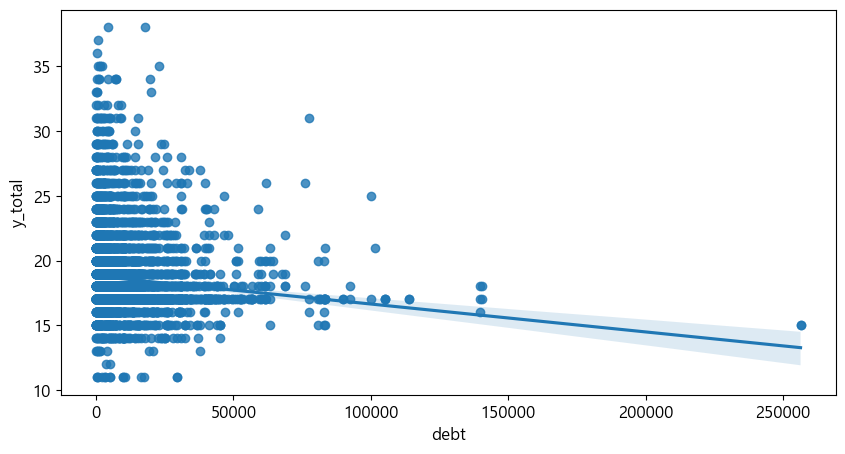

In [12]:
sns.regplot(data=df,x='debt',y='y_total')

In [13]:
## ÏãúÍ∞ÅÌôîÎ•º ÏßÑÌñâ Ìïú Í≤∞Í≥º, incomeÏù¥Îûë debtÍ∞Ä ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÏûàÏñ¥Î≥¥Ïó¨ÏÑú ÏÉÅÍ¥ÄÎ∂ÑÏÑù ÏßÑÌñâÌï®.

In [14]:
corr  = df[['income', 'debt' ,'y_total']].corr()
corr

income      debt   y_total
income   1.000000  0.300693 -0.222360
debt     0.300693  1.000000 -0.098187
y_total -0.222360 -0.098187  1.000000

In [15]:
## Í∑ºÎç∞ incomeÍ≥º debtÏùò Îã®ÏúÑÎäî Í∞ôÏßÄÎßå Í∏∞Ï¥àÌÜµÍ≥ÑÎüâÏùÑ ÌôïÏù∏Ìï¥ Î≥∏ Í≤∞Í≥º Ïä§ÏºÄÏùº Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÍ±∞ Í∞ôÏïÑÏÑú Î°úÍ∑∏Î≥ÄÌôò ÏßÑÌñâ

In [16]:
df['income'] = np.log1p(df['income'])
df['debt'] = np.log1p(df['debt'])

df.head()

gen  age religion   edu  sm_year sm_state  sm_day dr_mean_year dr_6cup  \
0   female   78      yes    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
2     male   81      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
8   female   53      yes    Í≥†Ï°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
9   female   31       no    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
13    male   45       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN      yes    14.0        Ïõî2~3Ìöå     Ïó∞1Ìöå   

   dr_hurt  ... preg_experience health_state  disabled work_state work_code  \
0      NaN  ...              ÏóÜÎã§            2     abled     nowork       NaN   
2      NaN  ...              ÎÇ®ÏÑ±            4     abled       work     762.0   
8      NaN  ...              ÏóÜÎã§            2     abled       work     151.0   
9      NaN  ...              ÏóÜÎã§            2     abled     nowork       NaN   
13      Ï†ÑÌòÄ  ...              ÎÇ®ÏÑ±            4     abled       work     399.0   

    region    income  y_total      debt  y_train  
0     city  6.006353       20  9.244838        0  
2     city  7.742836       18  9.962747        0  
8     city  7.737093       21  6.928538        0  
9     city  7.737093       17  6.928538        0  
13    city  8.692658       20  9.466687        0  

[5 rows x 21 columns]

#### Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

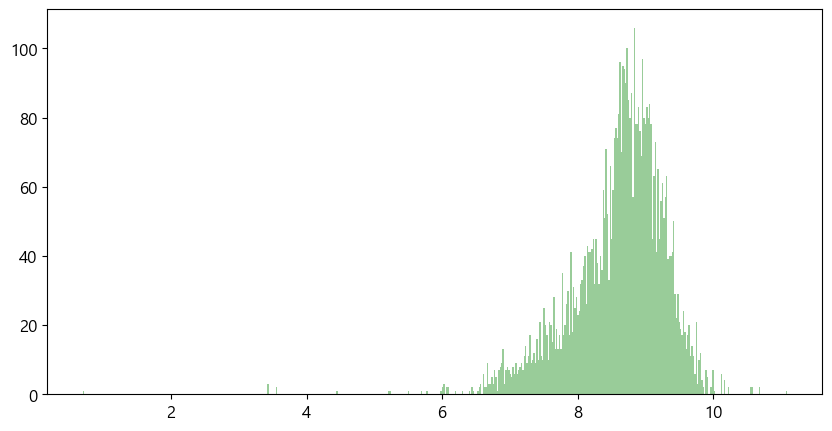

In [17]:
plt.hist(df['income'], color = 'green', alpha = 0.4, bins = 500)
plt.show()

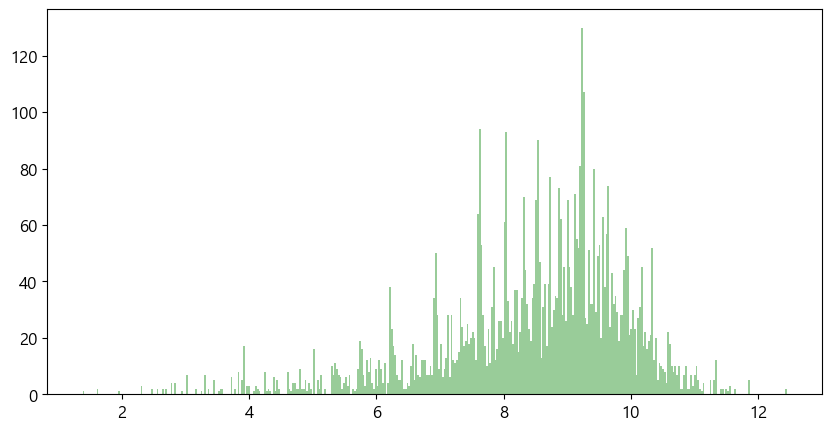

In [18]:
plt.hist(df['debt'], color = 'green', alpha = 0.4, bins = 400)
plt.show()

## Î™ÖÎ™©Ìòï Î≥ÄÏàòÏùò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨

### ÎÇòÏù¥Î≥ÄÏàòÏùò Î≤îÏ£ºÌôî - > ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä

In [19]:
bins = [20,29,39,49,59,99]
labels = ['19~29ÏÑ∏','30~39ÏÑ∏','40~49ÏÑ∏','50~59ÏÑ∏','60ÏÑ∏ Ïù¥ÏÉÅ']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

gen  age religion   edu  sm_year sm_state  sm_day dr_mean_year dr_6cup  \
0   female   78      yes    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
2     male   81      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
8   female   53      yes    Í≥†Ï°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
9   female   31       no    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
13    male   45       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN      yes    14.0        Ïõî2~3Ìöå     Ïó∞1Ìöå   

   dr_hurt  ... health_state disabled  work_state work_code region    income  \
0      NaN  ...            2    abled      nowork       NaN   city  6.006353   
2      NaN  ...            4    abled        work     762.0   city  7.742836   
8      NaN  ...            2    abled        work     151.0   city  7.737093   
9      NaN  ...            2    abled      nowork       NaN   city  7.737093   
13      Ï†ÑÌòÄ  ...            4    abled        work     399.0   city  8.692658   

   y_total      debt  y_train  age_range  
0       20  9.244838        0     60ÏÑ∏ Ïù¥ÏÉÅ  
2       18  9.962747        0     60ÏÑ∏ Ïù¥ÏÉÅ  
8       21  6.928538        0     50~59ÏÑ∏  
9       17  6.928538        0     30~39ÏÑ∏  
13      20  9.466687        0     40~49ÏÑ∏  

[5 rows x 22 columns]

In [20]:
df.drop('age',axis=1,inplace=True)
df.head()

gen religion   edu  sm_year sm_state  sm_day dr_mean_year dr_6cup  \
0   female      yes    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
2     male      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
8   female      yes    Í≥†Ï°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
9   female       no    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
13    male       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN      yes    14.0        Ïõî2~3Ìöå     Ïó∞1Ìöå   

   dr_hurt dr_worry  ... health_state  disabled work_state work_code  region  \
0      NaN      NaN  ...            2     abled     nowork       NaN    city   
2      NaN      NaN  ...            4     abled       work     762.0    city   
8      NaN      NaN  ...            2     abled       work     151.0    city   
9      NaN      NaN  ...            2     abled     nowork       NaN    city   
13      Ï†ÑÌòÄ       Ï†ÑÌòÄ  ...            4     abled       work     399.0    city   

      income  y_total      debt  y_train  age_range  
0   6.006353       20  9.244838        0     60ÏÑ∏ Ïù¥ÏÉÅ  
2   7.742836       18  9.962747        0     60ÏÑ∏ Ïù¥ÏÉÅ  
8   7.737093       21  6.928538        0     50~59ÏÑ∏  
9   7.737093       17  6.928538        0     30~39ÏÑ∏  
13  8.692658       20  9.466687        0     40~49ÏÑ∏  

[5 rows x 21 columns]

In [21]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

In [22]:
## Î™ÖÎ™©Ìòï Î≥ÄÏàò 
## gen religion edu sm_state dr_mean_year dr_6cup dr_hurt dr_worry preg_experience health_state disabled work_state income age_range


## Î™ÖÎ™©Ìòï Î≥ÄÏàòÏùò ÎπàÎèÑÏàò ÌôïÏù∏

In [23]:
cnames = ['gen' ,'religion' ,'edu' ,'sm_state' ,'dr_mean_year','dr_6cup' ,'dr_hurt' ,'dr_worry' ,'preg_experience', 'health_state','disabled', 'work_state','age_range']

In [24]:
df['gen'].value_counts()

gen
female    2887
male      2527
Name: count, dtype: int64

In [25]:
df['religion'].value_counts()

religion
no     3015
yes    2399
Name: count, dtype: int64

In [26]:
df['edu'].value_counts()

edu
ÎåÄÏ°∏Ïù¥ÏÉÅ    2686
Í≥†Ï°∏      1690
Ï¥àÏ°∏Ïù¥Ìïò     607
Ï§ëÏ°∏       431
Name: count, dtype: int64

In [27]:
df['sm_state'].value_counts()

sm_state
no     4366
yes    1048
Name: count, dtype: int64

In [28]:
df['dr_mean_year'].value_counts()

dr_mean_year
Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå    2459
Ïõî2~3Ìöå      1127
Ï£º2~3Ìöå       807
Ïõî1Ìöå         662
Ï£º4ÌöåÏù¥ÏÉÅ       359
Name: count, dtype: int64

In [29]:
df['dr_6cup'].value_counts()

dr_6cup
Ï†ÑÌòÄ     1052
Ïõî1Ìöå     607
Ï£º1Ìöå     568
Ïó∞1Ìöå     546
Îß§Ïùº      182
Name: count, dtype: int64

In [30]:
df['dr_hurt'].value_counts()

dr_hurt
Ï†ÑÌòÄ      2881
Í≥ºÍ±∞Ï°¥Ïû¨      61
ÏµúÍ∑ºÏ°¥Ïû¨      13
Name: count, dtype: int64

In [31]:
df['dr_worry'].value_counts()

dr_worry
Ï†ÑÌòÄ      2650
ÏµúÍ∑ºÏ°¥Ïû¨     214
Í≥ºÍ±∞Ï°¥Ïû¨      91
Name: count, dtype: int64

In [32]:
df['preg_experience'].value_counts()


preg_experience
ÏóÜÎã§    2830
ÎÇ®ÏÑ±    2527
ÏûàÎã§      57
Name: count, dtype: int64

In [33]:
df['health_state'].value_counts()


health_state
4    3150
3     995
2     645
5     563
1      61
Name: count, dtype: int64

In [34]:
df['disabled'].value_counts()


disabled
abled       5096
disabled     318
Name: count, dtype: int64

In [35]:
df['work_state'].value_counts()


work_state
work      3801
nowork    1613
Name: count, dtype: int64

In [36]:
df['age_range'].value_counts()


age_range
60ÏÑ∏ Ïù¥ÏÉÅ    1729
40~49ÏÑ∏    1176
50~59ÏÑ∏    1086
30~39ÏÑ∏     758
19~29ÏÑ∏     656
Name: count, dtype: int64

In [37]:
cnames

['gen',
 'religion',
 'edu',
 'sm_state',
 'dr_mean_year',
 'dr_6cup',
 'dr_hurt',
 'dr_worry',
 'preg_experience',
 'health_state',
 'disabled',
 'work_state',
 'age_range']

## Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ ÌôïÏù∏  :  Î™ÖÎ™©Ìòï Î≥ÄÏàòÎì§Ïùò y_trainÏóê Îî∞Î•∏ Ï∞®Ïù¥ ÌôïÏù∏

### Ï†ÑÏ≤¥Ï†ÅÏù∏ Í≤ΩÌñ•ÏÑ±ÏùÄ ÎÇòÏù¥Í∞Ä ÎßéÏïÑÏßàÏàòÎ°ù Ïö∞Ïö∏Í∞êÏù¥ ÎÜíÍ≤å ÎÇòÌÉÄÎÇúÎã§. ÌäπÌûà ÎÖ∏ÎÖÑÏ∏µÏùò Ïö∞Ïö∏Í∞êÏùÄ ÍµâÏû•Ìûà ÎÜíÎã§

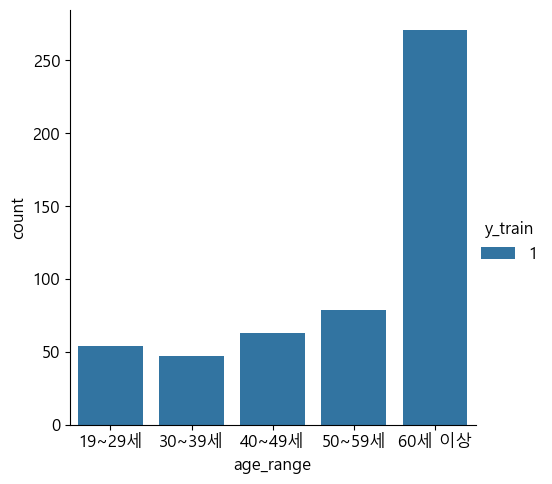

In [38]:
sns.catplot(data=df.loc[df['y_train']==1],x='age_range',kind='count',hue='y_train')

Ï¢ÖÍµêÏóê Îî∞Î•∏ Ïö∞Ïö∏Í∞ê Í≤ΩÌóòÏó¨Î∂ÄÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÎäîÍ≤ÉÏúºÎ°ú Î≥¥ÏûÑ

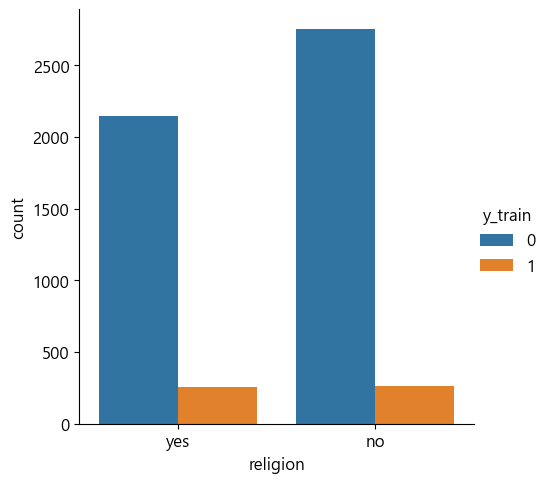

In [39]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

ÍµêÏú°ÏàòÏ§ÄÏóê Îî∞Î•∏ Ïö∞Ïö∏Í∞ê Í≤ΩÌóòÏó¨Î∂ÄÏùò ÎπÑÏú®ÏùÄ Ï¥àÏ°∏Ïù∏ ÏÇ¨ÎûåÎì§Ïù¥ Í∞ÄÏû•ÎÜíÏïòÏùå.

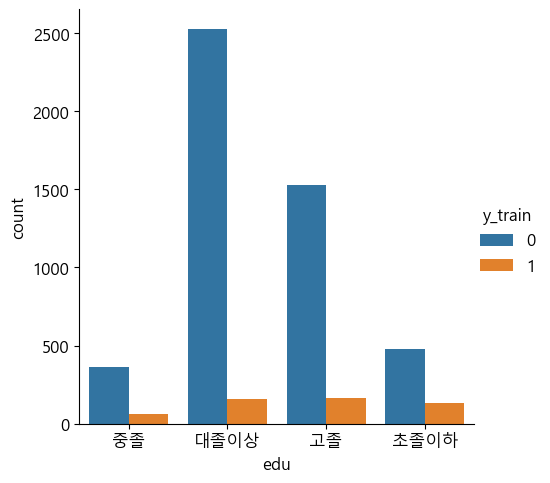

In [40]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')
plt.show()
plt.close()

Ìù°Ïó∞Ïó¨Î∂ÄÎäî Ïï†Îß§Ìï®. -> Îã§Ïö¥ÏÉòÌîåÎßÅ ÏßÑÌñâ

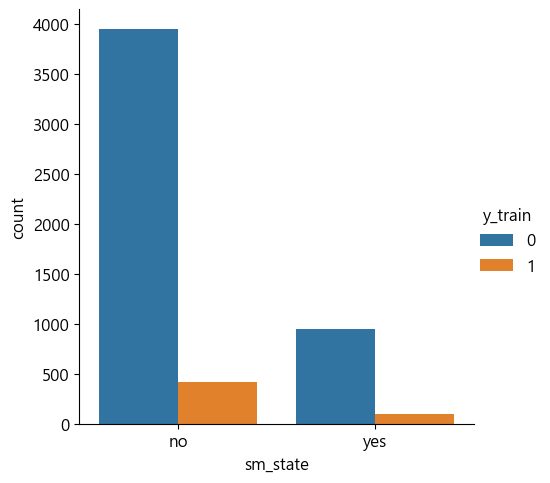

In [41]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [42]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =1048 ,
                            random_state = 2020)
                            


In [43]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

### Ìù°Ïó∞ Í∏∞Í∞ÑÏóê Îî∞Î•∏ Ïö∞Ïö∏Í∞ê Ï†êÏàò Ï∞®Ïù¥ ÏóÜÏùå


In [44]:
df.head()

gen religion   edu  sm_year sm_state  sm_day dr_mean_year dr_6cup  \
0   female      yes    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
2     male      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
8   female      yes    Í≥†Ï°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
9   female       no    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
13    male       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN      yes    14.0        Ïõî2~3Ìöå     Ïó∞1Ìöå   

   dr_hurt dr_worry  ... health_state  disabled work_state work_code  region  \
0      NaN      NaN  ...            2     abled     nowork       NaN    city   
2      NaN      NaN  ...            4     abled       work     762.0    city   
8      NaN      NaN  ...            2     abled       work     151.0    city   
9      NaN      NaN  ...            2     abled     nowork       NaN    city   
13      Ï†ÑÌòÄ       Ï†ÑÌòÄ  ...            4     abled       work     399.0    city   

      income  y_total      debt  y_train  age_range  
0   6.006353       20  9.244838        0     60ÏÑ∏ Ïù¥ÏÉÅ  
2   7.742836       18  9.962747        0     60ÏÑ∏ Ïù¥ÏÉÅ  
8   7.737093       21  6.928538        0     50~59ÏÑ∏  
9   7.737093       17  6.928538        0     30~39ÏÑ∏  
13  8.692658       20  9.466687        0     40~49ÏÑ∏  

[5 rows x 21 columns]

In [45]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()

sm_state
yes    1048
no     1048
Name: count, dtype: int64

Î≥ÑÏ∞®Ïù¥ ÏóÜÏùå>


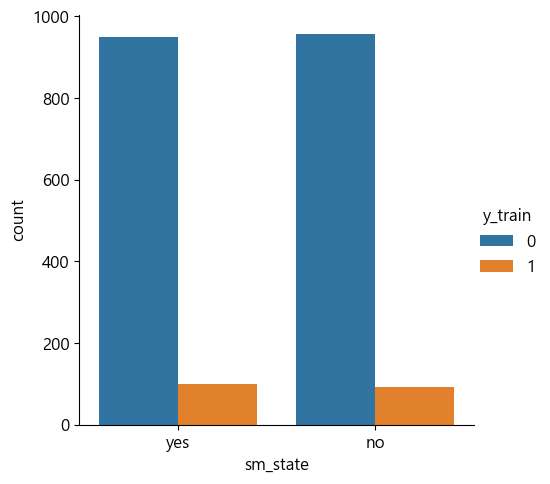

In [46]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

Ïó∞ÌèâÍ∑† ÏùåÏ£ºÎüâÎèÑ Î≥Ñ Ï∞®Ïù¥ ÏóÜÏñ¥Î≥¥ÏûÑ.

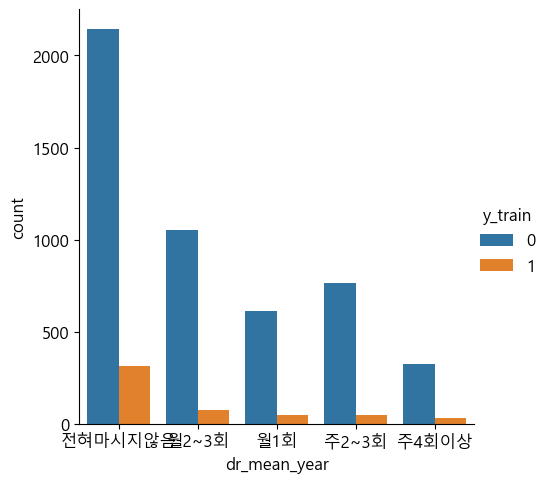

In [47]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [48]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

Ïà†ÏùÑ ÌïúÎ≤àÎßàÏã§Îïå 6Ïûî Ïù¥ÏÉÅ ÎßàÏãúÎäî ÏÇ¨ÎûåÎì§Ïù¥ Ïö∞Ïö∏Í∞êÏùÑ ÎäêÎÅºÎäîÍ∞ÄÏóê ÎåÄÌïú Í∞ÄÏÑ§ÏùÄ ÏùòÎØ∏ x

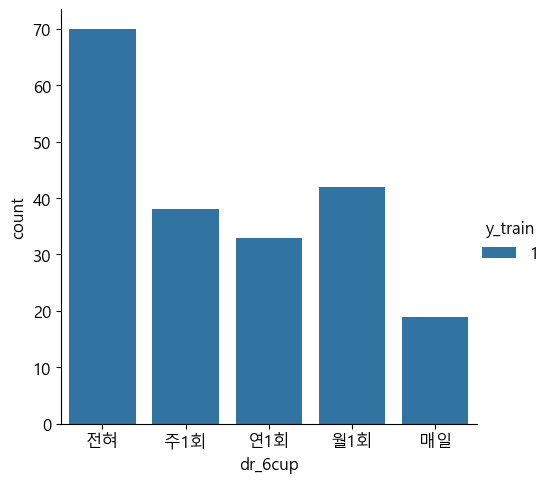

In [49]:
sns.catplot(data=over_dr.loc[over_dr['y_train']==1],x='dr_6cup',kind='count',hue='y_train')

ÏûÑÏã†Í≤ΩÌóò Ïó¨Î∂ÄÎäî Î≥Ñ Ï∞®Ïù¥ ÏóÜÏùå

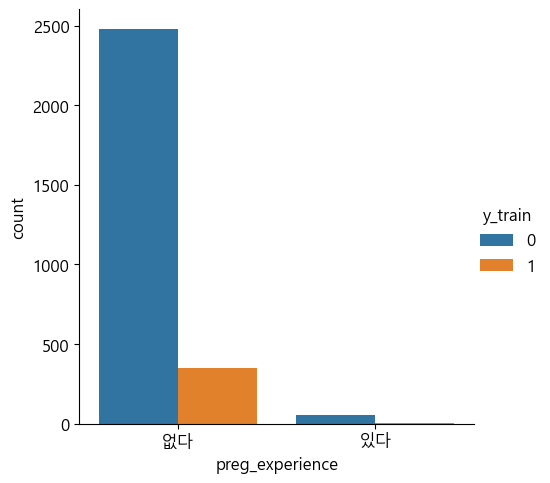

In [50]:
woman = df.loc[df['preg_experience']!='ÎÇ®ÏÑ±']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [51]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='ÏóÜÎã§'],
                            replace=False,
                            n_samples =57 ,
                            random_state = 2020)

In [52]:
sm_data = pd.concat([woman[woman['preg_experience']=='ÏûàÎã§'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
ÏûàÎã§    57
ÏóÜÎã§    57
Name: count, dtype: int64

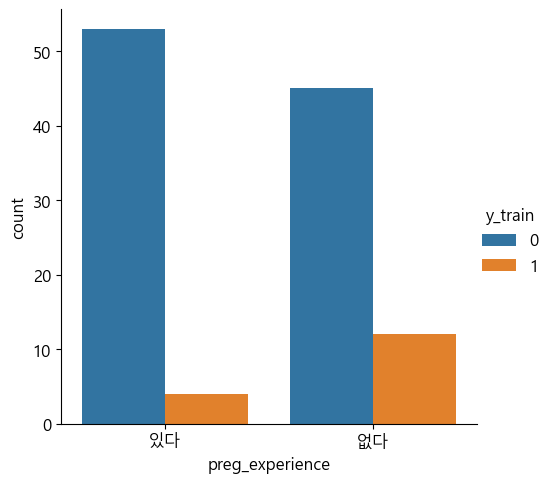

In [53]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

Í±¥Í∞ï ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÎ©¥ Ïö∞Ïö∏Í∞êÏùÑ Í≤ΩÌóòÌïòÎäî Í≤ΩÏö∞Í∞Ä Ï†ÅÎã§.

health_state   y_total
health_state      1.000000 -0.342151
y_total          -0.342151  1.000000

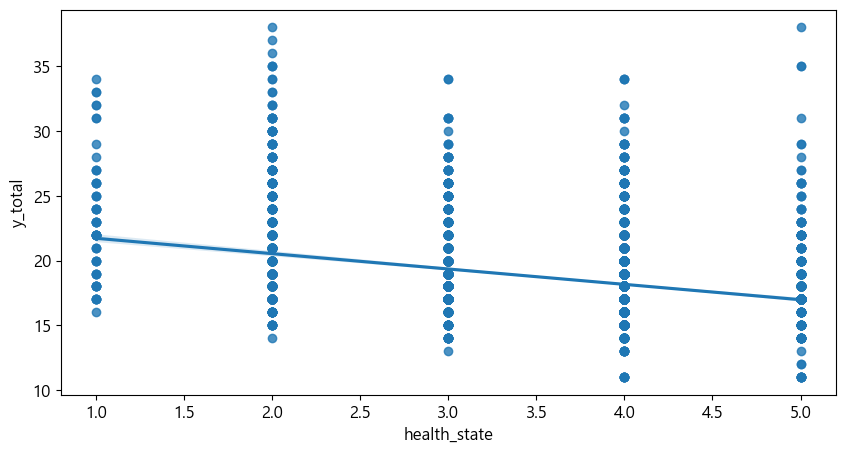

In [54]:
sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

Ïû•Ïï†Ïó¨Î∂ÄÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ Ï∞®Ïù¥Í∞Ä Ïã¨Ìï¥ÏÑú ÎπÑÍµêÌïòÍ∏∞ Ïï†Îß§Ìï® -> Îã§Ïö¥ÏÉòÌîåÎßÅ

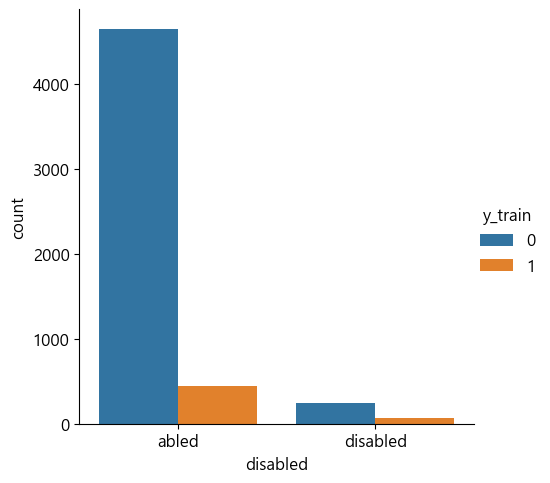

In [55]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [56]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =319 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
abled       319
disabled    318
Name: count, dtype: int64

Ï∞®Ïù¥ ÏûàÏùå

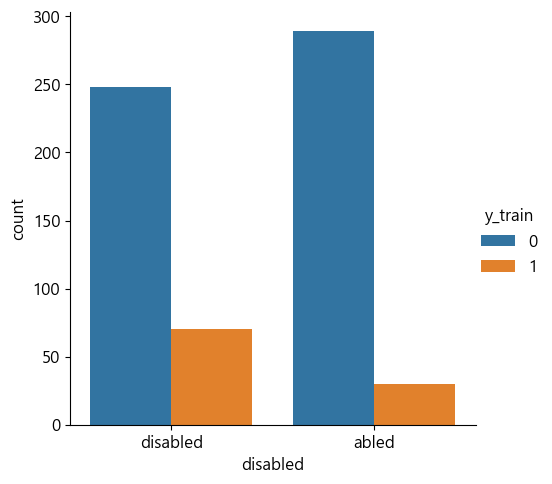

In [57]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [58]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

ÎÖ∏ÎèôÏó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥ ÎßéÏù¥ ÎÇ®

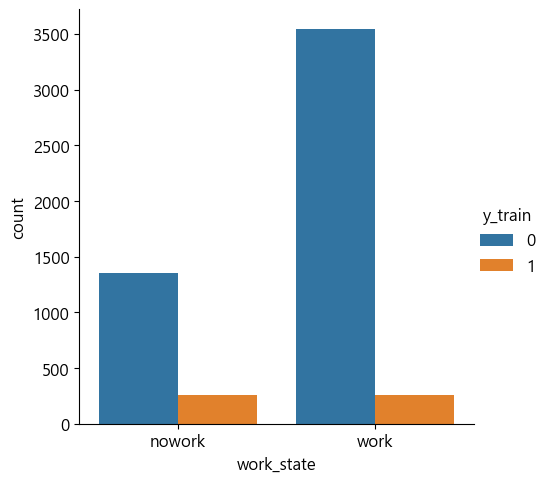

In [59]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

ÏÇ¨Îäî ÏßÄÏó≠Ïóê Îî∞Îùº Ïö∞Ïö∏Í∞ê Í≤ΩÌóòÏùòÏ∞®Ïù¥Îäî ÏóÜ„ÖáÎØÄ

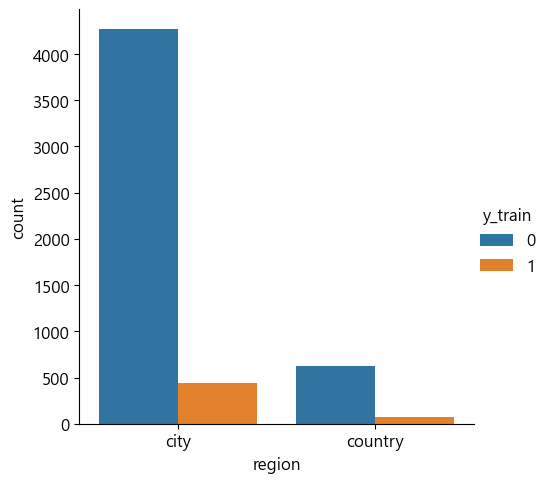

In [60]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [61]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =696 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    696
city       696
Name: count, dtype: int64

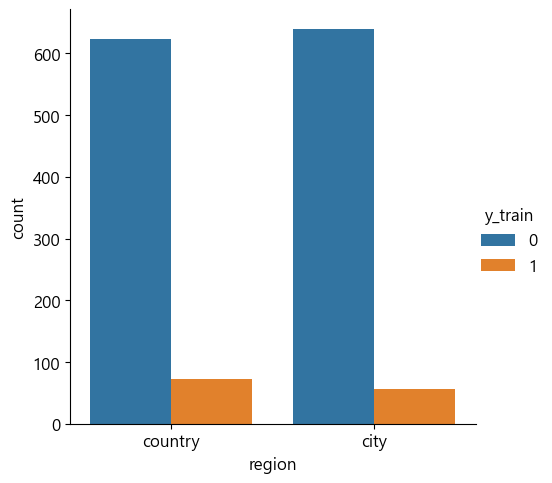

In [62]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

ÏÑ±Î≥ÑÏóê Îî∞Î•∏ Ï∞®Ïù¥ ÏûáÏùå

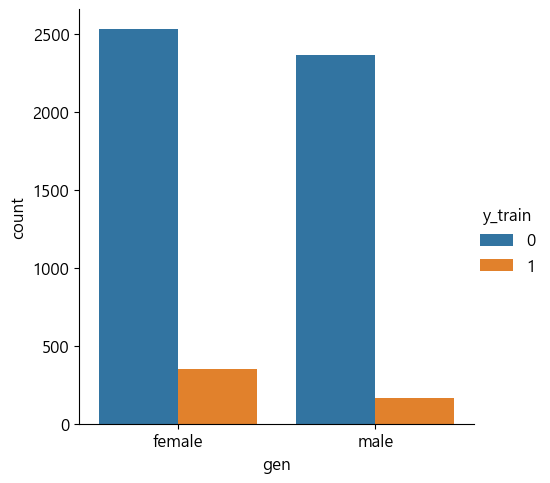

In [63]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [64]:
df.head()

gen religion   edu  sm_year sm_state  sm_day dr_mean_year dr_6cup  \
0   female      yes    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
2     male      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
8   female      yes    Í≥†Ï°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
9   female       no    Ï§ëÏ°∏      NaN       no     NaN      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN   
13    male       no  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN      yes    14.0        Ïõî2~3Ìöå     Ïó∞1Ìöå   

   dr_hurt dr_worry  ... health_state  disabled work_state work_code  region  \
0      NaN      NaN  ...            2     abled     nowork       NaN    city   
2      NaN      NaN  ...            4     abled       work     762.0    city   
8      NaN      NaN  ...            2     abled       work     151.0    city   
9      NaN      NaN  ...            2     abled     nowork       NaN    city   
13      Ï†ÑÌòÄ       Ï†ÑÌòÄ  ...            4     abled       work     399.0    city   

      income  y_total      debt  y_train  age_range  
0   6.006353       20  9.244838        0     60ÏÑ∏ Ïù¥ÏÉÅ  
2   7.742836       18  9.962747        0     60ÏÑ∏ Ïù¥ÏÉÅ  
8   7.737093       21  6.928538        0     50~59ÏÑ∏  
9   7.737093       17  6.928538        0     30~39ÏÑ∏  
13  8.692658       20  9.466687        0     40~49ÏÑ∏  

[5 rows x 21 columns]

In [65]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

## Î≥ÄÏàò Í≥®ÎùºÎÇ¥Í∏∞ 

In [66]:
df = df.loc[:,['gen','edu','health_state','disabled','work_state','income','y_total','debt','y_train','age_range']]
df.head()

gen   edu  health_state disabled work_state    income  y_total  \
0   female    Ï§ëÏ°∏             2    abled     nowork  6.006353       20   
2     male  ÎåÄÏ°∏Ïù¥ÏÉÅ             4    abled       work  7.742836       18   
8   female    Í≥†Ï°∏             2    abled       work  7.737093       21   
9   female    Ï§ëÏ°∏             2    abled     nowork  7.737093       17   
13    male  ÎåÄÏ°∏Ïù¥ÏÉÅ             4    abled       work  8.692658       20   

        debt  y_train age_range  
0   9.244838        0    60ÏÑ∏ Ïù¥ÏÉÅ  
2   9.962747        0    60ÏÑ∏ Ïù¥ÏÉÅ  
8   6.928538        0    50~59ÏÑ∏  
9   6.928538        0    30~39ÏÑ∏  
13  9.466687        0    40~49ÏÑ∏

## Î≥ÄÏàòÎì§Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî Í≥ºÏ†ï

In [67]:
df['age_range']= df['age_range'].astype('str')
df['age_range'].unique()

array(['60ÏÑ∏ Ïù¥ÏÉÅ', '50~59ÏÑ∏', '30~39ÏÑ∏', '40~49ÏÑ∏', '19~29ÏÑ∏', 'nan'],
      dtype=object)

In [68]:
df['age_range'] = df['age_range'].fillna(0)
df = df.loc[df['age_range']!=0,:]

In [69]:
df.head()

gen   edu  health_state disabled work_state    income  y_total  \
0   female    Ï§ëÏ°∏             2    abled     nowork  6.006353       20   
2     male  ÎåÄÏ°∏Ïù¥ÏÉÅ             4    abled       work  7.742836       18   
8   female    Í≥†Ï°∏             2    abled       work  7.737093       21   
9   female    Ï§ëÏ°∏             2    abled     nowork  7.737093       17   
13    male  ÎåÄÏ°∏Ïù¥ÏÉÅ             4    abled       work  8.692658       20   

        debt  y_train age_range  
0   9.244838        0    60ÏÑ∏ Ïù¥ÏÉÅ  
2   9.962747        0    60ÏÑ∏ Ïù¥ÏÉÅ  
8   6.928538        0    50~59ÏÑ∏  
9   6.928538        0    30~39ÏÑ∏  
13  9.466687        0    40~49ÏÑ∏

In [70]:
# df=df.loc[:,['gen','edu','health_state','disabled','work_state','y_train','age_range','log_income','log_debt']]
# df.head()

In [71]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2
df['gen'] = df['gen'].astype('category')

df.loc[df['edu']=='Ï¥àÏ°∏Ïù¥Ìïò','edu']=1
df.loc[df['edu']=='Ï§ëÏ°∏','edu']=2
df.loc[df['edu']=='Í≥†Ï°∏','edu']=3
df.loc[df['edu']=='ÎåÄÏ°∏Ïù¥ÏÉÅ','edu']=4
df['edu'] = df['edu'].astype('category')

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2
df['disabled'] = df['disabled'].astype('category')


df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2
df['work_state'] = df['work_state'].astype('category')

df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29ÏÑ∏','age_range']=1
df.loc[df['age_range']=='30~39ÏÑ∏','age_range']=2
df.loc[df['age_range']=='40~49ÏÑ∏','age_range']=3
df.loc[df['age_range']=='50~59ÏÑ∏','age_range']=4
df.loc[df['age_range']=='60ÏÑ∏ Ïù¥ÏÉÅ','age_range']=5
df['age_range'] = df['age_range'].astype('category')


# df= pd.get_dummies(test,drop_first=True,dtype='int')
# df.columns

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   int64   
 3   disabled      5414 non-null   category
 4   work_state    5414 non-null   category
 5   income        5414 non-null   float64 
 6   y_total       5414 non-null   int64   
 7   debt          5414 non-null   float64 
 8   y_train       5414 non-null   int64   
 9   age_range     5414 non-null   category
dtypes: category(5), float64(2), int64(3)
memory usage: 281.0 KB


In [73]:
df['health_state'].unique()

array([2, 4, 3, 5, 1], dtype=int64)

In [74]:
### Í±¥Í∞ïÎßåÏ°±ÎèÑ „Ñ±„Ñ± 

ctype = pd.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)

df['health_state'] = df['health_state'].astype(ctype)

df['health_state'].dtypes


CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

## Í∞ÄÏÑ§ Í≤ÄÏ†ï - Ïó∞ÏÜçÌòï Î≥ÄÏàò
### Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï

In [75]:
stats.normaltest(df['income'])

NormaltestResult(statistic=1747.4194887987817, pvalue=0.0)

In [76]:
stats.normaltest(df['debt'])
## ÏÑ±Î¶Ω x 

NormaltestResult(statistic=902.8790811642938, pvalue=8.755856035202143e-197)

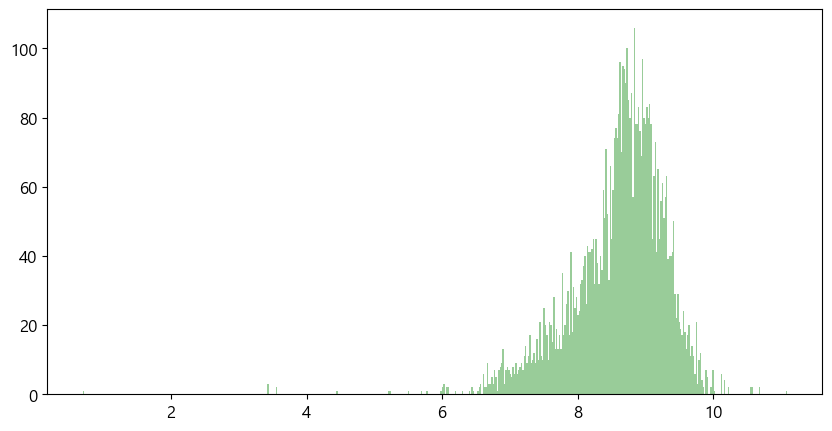

In [77]:
plt.hist(df['income'], color = 'green', alpha = 0.4, bins = 500)
plt.show()


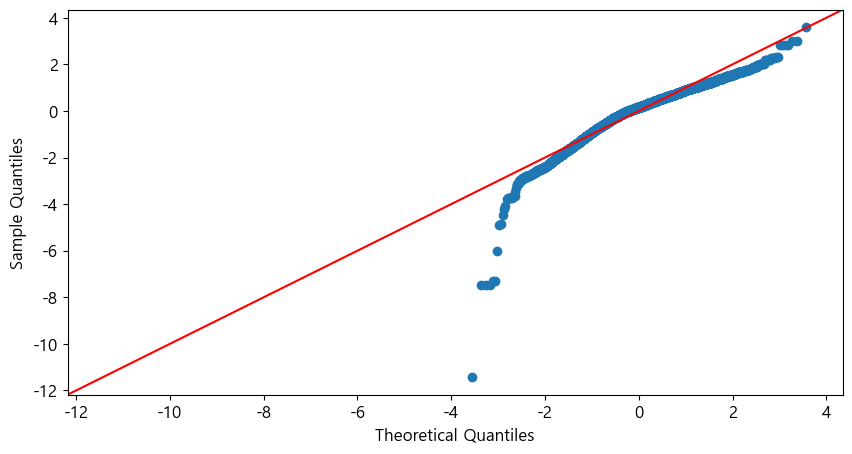

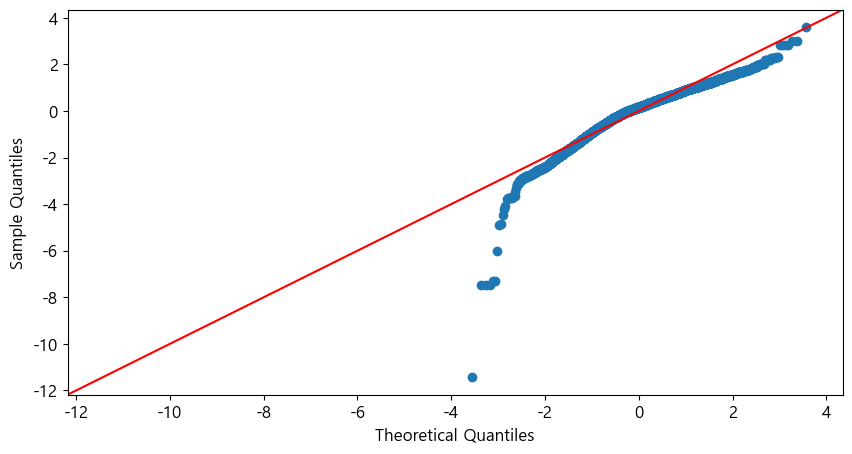

In [78]:
sm.qqplot(df['income'], line='45', fit = True)

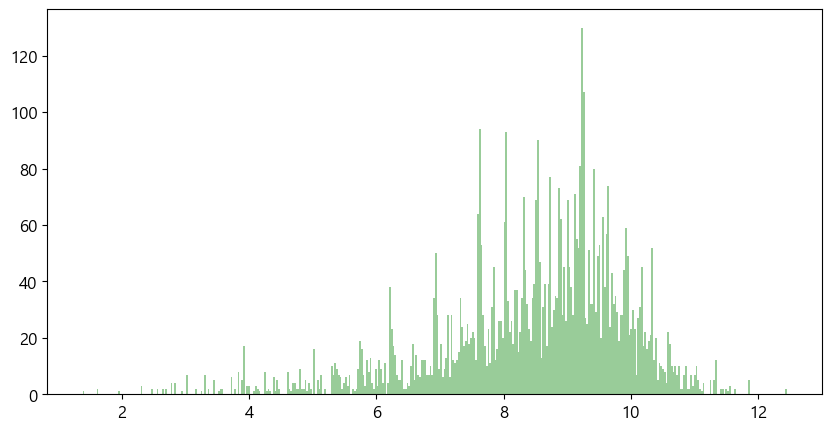

In [79]:
plt.hist(df['debt'], color = 'green', alpha = 0.4, bins = 400)
plt.show()

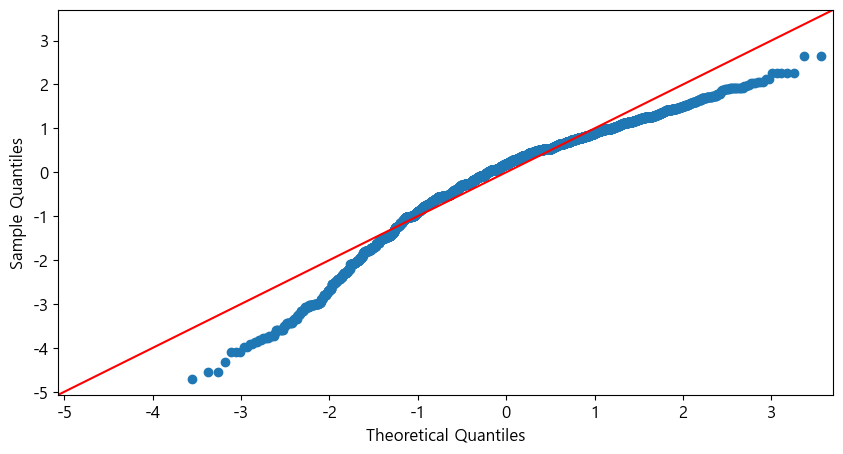

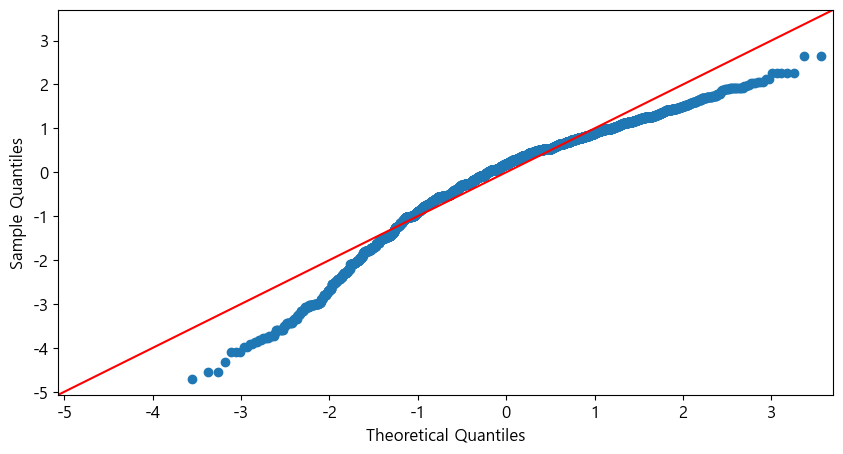

In [80]:
sm.qqplot(df['debt'], line='45', fit = True)

#### Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï Í≤∞Í≥ºÎäî pÍ∞íÏù¥ 0Ïóê Í∞ÄÍπåÏö∞ÎÇò ÌëúÎ≥∏Ïùò ÏàòÍ∞Ä ÌÅ¨Îã§Îäî Ï†êÍ≥º, ÌûàÏä§ÌÜ†Í∑∏Îû® Î∞è qqÌîåÎ°Ø ÏãúÍ∞ÅÌôî Í≤∞Í≥º Ïñ¥ÎäêÏ†ïÎèÑÏùò Ï†ïÍ∑úÏÑ±ÏùÑ ÎùÑÎäîÍ±∏Î°ú ÌôïÏù∏ÌñàÍ∏∞ÎñÑÎ¨∏Ïóê Ï†ïÍ∑úÏÑ±ÏùÑ Í∞ÄÏ†ïÌïòÍ≥† Î∂ÑÏÑùÏùÑ ÏßÑÌñâ

### Îì±Î∂ÑÏÇ∞ÏÑ± 
#### Ïö∞Ïö∏Í∞êÏùÑ ÎäêÎÅºÎäî ÏßëÎã®Í≥º ÏïàÎäêÎÅºÎäî ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÄÏßÄ Í≤ÄÏ†ï

In [81]:
data=pd.read_excel("ÎπöÏ∂îÍ∞ÄÎßàÏßÄÎßâ.xlsx")

In [82]:
train = data.loc[(data['income']>27),:]
train['income'] = np.log1p(train['income'])

C:\Users\user\AppData\Local\Temp\ipykernel_16124\2571767070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['income'] = np.log1p(train['income'])


In [83]:
train.head()

Unnamed: 0     gen  age religion   edu  sm_year sm_state  sm_day  \
0           0  female   78      yes    Ï§ëÏ°∏      NaN       no     NaN   
1           1    male   75       no  Ï¥àÏ°∏Ïù¥Ìïò      NaN       no     NaN   
2           2    male   81      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN   
3           3    male   61      yes  ÎåÄÏ°∏Ïù¥ÏÉÅ      NaN       no     NaN   
4           4  female   60      yes    Í≥†Ï°∏      NaN       no     NaN   

  dr_mean_year dr_6cup  ... preg_experience health_state disabled  work_state  \
0      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÏóÜÎã§            2    abled      nowork   
1      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÎÇ®ÏÑ±            1    abled        work   
2      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÎÇ®ÏÑ±            4    abled        work   
3      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÎÇ®ÏÑ±            4    abled        work   
4      Ï†ÑÌòÄÎßàÏãúÏßÄÏïäÏùå     NaN  ...              ÏóÜÎã§            4    abled        work   

  work_code region    income y_total     debt  y_train  
0       NaN   city  6.006353      20  10350.0        0  
1     942.0   city  7.933438      29      0.0        1  
2     762.0   city  7.742836      18  21220.0        0  
3     855.0   city  8.562549      20      0.0        0  
4     399.0   city  8.562549      21      0.0        0  

[5 rows x 22 columns]

In [84]:
y_income_0 = train.loc[train['y_train']==0,'income']
y_income_1 = train.loc[train['y_train']==1,'income']


In [85]:
stats.levene(y_income_1,y_income_0)

LeveneResult(statistic=0.023232134473999987, pvalue=0.8788572576668049)

In [86]:
y_train_debt_0 = df.loc[df['y_train']==0,'debt']
y_train_debt_1 = df.loc[df['y_train']==1,'debt']

In [87]:
stats.levene(y_train_debt_1,y_train_debt_0)

LeveneResult(statistic=3.6671032100108305, pvalue=0.05554921572874413)

## Î™ÖÎ™©Ìòï Î≥ÄÏàòÏùò Í≤ÄÏ†ï - Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï 

In [88]:
df.columns

Index(['gen', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

In [89]:
from scipy.stats import chi2_contingency
result_gen = pd.crosstab(df['gen'],df['y_train'])
chiresult_gen = chi2_contingency(observed=result_gen)
chiresult_gen

Chi2ContingencyResult(statistic=52.82640062154608, pvalue=3.643704777736139e-13, dof=1, expected_freq=array([[2286.15552272,  240.84447728],
       [2611.84447728,  275.15552272]]))

In [90]:
result_edu = pd.crosstab(df['edu'],df['y_train'])
chiresult_edu = chi2_contingency(observed=result_edu)
chiresult_edu

Chi2ContingencyResult(statistic=159.10232692000645, pvalue=2.8631980008510046e-34, dof=3, expected_freq=array([[ 549.14776505,   57.85223495],
       [ 389.92205393,   41.07794607],
       [1528.92870336,  161.07129664],
       [2430.00147765,  255.99852235]]))

In [91]:
result_health_state = pd.crosstab(df['health_state'],df['y_train'])
chiresult_health_state = chi2_contingency(observed=result_health_state)
chiresult_health_state

Chi2ContingencyResult(statistic=447.5737358381009, pvalue=1.4533461899751813e-95, dof=4, expected_freq=array([[  55.18618397,    5.81381603],
       [ 583.52604359,   61.47395641],
       [ 900.16808275,   94.83191725],
       [2849.77835242,  300.22164758],
       [ 509.34133727,   53.65866273]]))

In [92]:
result_disabled = pd.crosstab(df['disabled'],df['y_train'])
chiresult_disabled = chi2_contingency(observed=result_disabled)
chiresult_disabled

Chi2ContingencyResult(statistic=59.51447238967723, pvalue=1.2139806889961367e-14, dof=1, expected_freq=array([[ 287.69190986,   30.30809014],
       [4610.30809014,  485.69190986]]))

In [93]:
result_work_state = pd.crosstab(df['work_state'],df['y_train'])
chiresult_work_state = chi2_contingency(observed=result_work_state)
chiresult_work_state

Chi2ContingencyResult(statistic=118.9403703663307, pvalue=1.0792561563352741e-27, dof=1, expected_freq=array([[3438.73254525,  362.26745475],
       [1459.26745475,  153.73254525]]))

In [94]:
df.head()

gen edu health_state disabled work_state    income  y_total      debt  \
0    2   2            2        2          2  6.006353       20  9.244838   
2    1   4            4        2          1  7.742836       18  9.962747   
8    2   3            2        2          1  7.737093       21  6.928538   
9    2   2            2        2          2  7.737093       17  6.928538   
13   1   4            4        2          1  8.692658       20  9.466687   

    y_train age_range  
0         0         5  
2         0         5  
8         0         4  
9         0         2  
13        0         3

In [95]:
df = df.drop('y_total',axis=1)


In [96]:
y_data = df['y_train']
new_df = df.drop('y_train',axis=1)
new_df = pd.get_dummies(new_df,drop_first=True,dtype='int')
new_df.head()

income      debt  gen_2  edu_2  edu_3  edu_4  health_state_2  \
0   6.006353  9.244838      1      1      0      0               1   
2   7.742836  9.962747      0      0      0      1               0   
8   7.737093  6.928538      1      0      1      0               1   
9   7.737093  6.928538      1      1      0      0               1   
13  8.692658  9.466687      0      0      0      1               0   

    health_state_3  health_state_4  health_state_5  disabled_2  work_state_2  \
0                0               0               0           1             1   
2                0               1               0           1             0   
8                0               0               0           1             0   
9                0               0               0           1             1   
13               0               1               0           1             0   

    age_range_2  age_range_3  age_range_4  age_range_5  age_range_nan  
0             0            0            0            1              0  
2             0            0            0            1              0  
8             0            0            1            0              0  
9             1            0            0            0              0  
13            0            1            0            0              0

In [97]:
y_data= pd.DataFrame(y_data,columns=['y_train'])

In [98]:
new_df = new_df.drop('age_range_nan',axis=1)
new_df['y_train'] = y_data['y_train']

In [99]:
def myOls(data, y, x):
    """
    ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌïúÎã§.

    Parameters
    -------
    - data : Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    - y: Ï¢ÖÏÜçÎ≥ÄÏàò Ïù¥Î¶Ñ
    - x: ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïù¥Î¶ÑÎì§(Î¶¨Ïä§Ìä∏)
    """

    # ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïù¥Î¶ÑÏù¥ Î¶¨Ïä§Ìä∏Í∞Ä ÏïÑÎãàÎùºÎ©¥ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
    if type(x) != list:
        x = [x]

    # Ï¢ÖÏÜçÎ≥ÄÏàò~ÎèÖÎ¶ΩÎ≥ÄÏàò1+ÎèÖÎ¶ΩÎ≥ÄÏàò2+ÎèÖÎ¶ΩÎ≥ÄÏàò3+... ÌòïÌÉúÏùò ÏãùÏùÑ ÏÉùÏÑ±
    expr = "%s~%s" % (y, "+".join(x))

    # ÌöåÍ∑ÄÎ™®Îç∏ ÏÉùÏÑ±
    model = ols(expr, data=data)
    # Î∂ÑÏÑù ÏàòÌñâ
    fit = model.fit()

    # ÌååÏù¥Ïç¨ Î∂ÑÏÑùÍ≤∞Í≥ºÎ•º Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïúÎã§.
    summary = fit.summary()

    # Ï≤´ Î≤àÏß∏, ÏÑ∏ Î≤àÏß∏ ÌëúÏùò ÎÇ¥Ïö©ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Î∂ÑÌï¥
    my = {}

    for k in range(0, 3, 2):
        items = summary.tables[k].data
        # print(items)

        for item in items:
            # print(item)
            n = len(item)

            for i in range(0, n, 2):
                key = item[i].strip()[:-1]
                value = item[i+1].strip()

                if key and value:
                    my[key] = value

    # Îëê Î≤àÏß∏ ÌëúÏùò ÎÇ¥Ïö©ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Î∂ÑÌï¥ÌïòÏó¨ myÏóê Ï∂îÍ∞Ä
    my['variables'] = []
    name_list = list(data.columns)
    #print(name_list)

    for i, v in enumerate(summary.tables[1].data):
        if i == 0:
            continue

        # Î≥ÄÏàòÏùò Ïù¥Î¶Ñ
        name = v[0].strip()

        vif = 0

        # InterceptÎäî Ï†úÏô∏
        if name in name_list:
            # Î≥ÄÏàòÏùò Ïù¥Î¶Ñ Î™©Î°ùÏóêÏÑú ÌòÑÏû¨ Î≥ÄÏàòÍ∞Ä Î™á Î≤àÏß∏ Ìï≠Î™©Ïù∏ÏßÄ Ï∞æÍ∏∞ 
            j = name_list.index(name)
            vif = variance_inflation_factor(data, j)

        my['variables'].append({
            "name": name,
            "coef": v[1].strip(),
            "std err": v[2].strip(),
            "t": v[3].strip(),
            "P-value": v[4].strip(),
            "Beta": 0,
            "VIF": vif,
        })

    # Í≤∞Í≥ºÌëúÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Íµ¨ÏÑ±
    mylist = []
    yname_list = []
    xname_list = []

    for i in my['variables']:
        if i['name'] == 'Intercept':
            continue

        yname_list.append(y)
        xname_list.append(i['name'])

        item = {
            "B": i['coef'],
            "ÌëúÏ§ÄÏò§Ï∞®": i['std err'],
            "Œ≤": i['Beta'],
            "t": "%s*" % i['t'],
            "Ïú†ÏùòÌôïÎ•†": i['P-value'],
            "VIF": i["VIF"]
        }

        mylist.append(item)

    table = DataFrame(mylist,
                   index=MultiIndex.from_arrays([yname_list, xname_list], names=['Ï¢ÖÏÜçÎ≥ÄÏàò', 'ÎèÖÎ¶ΩÎ≥ÄÏàò']))
    
    # Î∂ÑÏÑùÍ≤∞Í≥º
    result = "ùëÖ(%s), ùëÖ^2(%s), ùêπ(%s), Ïú†ÏùòÌôïÎ•†(%s), Durbin-Watson(%s)" % (my['R-squared'], my['Adj. R-squared'], my['F-statistic'], my['Prob (F-statistic)'], my['Durbin-Watson'])

    # Î™®Ìòï Ï†ÅÌï©ÎèÑ Î≥¥Í≥†
    goodness = "%sÏóê ÎåÄÌïòÏó¨ %sÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú %s(F(%s,%s) = %s, p < 0.05)." % (y, ",".join(x), "Ïú†ÏùòÌïòÎã§" if float(my['Prob (F-statistic)']) < 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÎã§", my['Df Model'], my['Df Residuals'], my['F-statistic'])

    # ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†
    varstr = []

    for i, v in enumerate(my['variables']):
        if i == 0:
            continue
        
        s = "%sÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî %s(p%s0.05)Î°ú, %sÏóê ÎåÄÌïòÏó¨ %s."
        k = s % (v['name'], v['coef'], "<" if float(v['P-value']) < 0.05 else '>', y, 'Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§' if float(v['P-value']) < 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§')

        varstr.append(k)

    ols_result = OlsResult()
    ols_result.model = model
    ols_result.fit = fit
    ols_result.summary = summary
    ols_result.table = table
    ols_result.result = result
    ols_result.goodness = goodness
    ols_result.varstr = varstr

    return ols_result

In [100]:
new_df.columns

Index(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2',
       'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2',
       'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4',
       'age_range_5', 'y_train'],
      dtype='object')

In [101]:
class OlsResult:
    def __init__(self):
        self._model = None
        self._fit = None
        self._summary = None
        self._table = None
        self._result = None
        self._goodness = None
        self._varstr = None

In [102]:
tmp = new_df.filter(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5', 'y_train'])

ols_result = myOls(tmp, y='y_train', x=['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     40.83
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          4.54e-121
Time:                        11:49:16   Log-Likelihood:                -738.52
No. Observations:                5414   AIC:                             1511.
Df Residuals:                    5397   BIC:                             1623.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8655      0.066     13.

In [103]:
new_df.head()

income      debt  gen_2  edu_2  edu_3  edu_4  health_state_2  \
0   6.006353  9.244838      1      1      0      0               1   
2   7.742836  9.962747      0      0      0      1               0   
8   7.737093  6.928538      1      0      1      0               1   
9   7.737093  6.928538      1      1      0      0               1   
13  8.692658  9.466687      0      0      0      1               0   

    health_state_3  health_state_4  health_state_5  disabled_2  work_state_2  \
0                0               0               0           1             1   
2                0               1               0           1             0   
8                0               0               0           1             0   
9                0               0               0           1             1   
13               0               1               0           1             0   

    age_range_2  age_range_3  age_range_4  age_range_5  y_train  
0             0            0            0            1        0  
2             0            0            0            1        0  
8             0            0            1            0        0  
9             1            0            0            0        0  
13            0            1            0            0        0

In [104]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2',
       'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2',
       'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4',
       'age_range_5'],
      dtype='object')

In [105]:
from scipy.stats import stats
from statsmodels.formula.api import logit
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


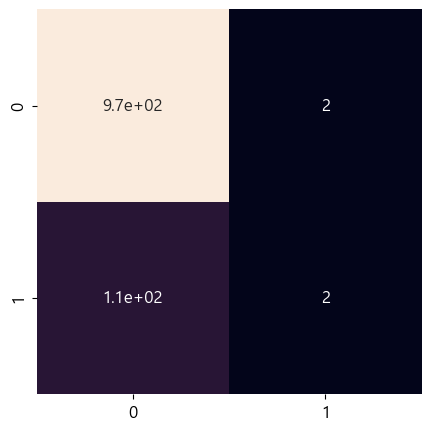

In [106]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbarÎ•º ÌÜµÌï¥ colorbarÏùò Ïú†Î¨¥Î•º Ï†ïÌï¥ Ï§Ñ Ïàò ÏûàÍ≥†
# linewidths Í∞Å cellÎßàÎã§ ÏÑ†ÏùÑ ÎÑ£Ïñ¥Ï£ºÍ≥† ÍµµÍ∏∞Î•º Ï†ïÌï† Ïàò ÏûàÎã§.
# annot Í∞Å cellÏùò Í∞íÏùÑ ÌëúÍ∏∞Ìï† Ïàò ÏûàÎã§. Ïù¥Îïå fmtÎ•º Ïù¥Ïö©Ìï¥ Í∞Å cell Í∞íÏùò Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÎ•º ÏßÄÏ†ïÌï¥Ï£ºÎäî Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÎã§.
# vmin, vmaxÎ°ú ÏÉâÏúºÎ°ú ÏµúÎåÄÍ∞í, ÏµúÏÜåÍ∞íÏùÑ ÌëúÌòÑÌï† Ïàò ÏûàÎã§. ex) vmin = 200, vmax=500
plt.show()

In [107]:
# ÌèâÍ∞ÄÏßÄÌëú
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.9003
Precision:0.5000
recall:0.0185
F1:0.0357
roc_auc:0.5082


In [108]:
new_df.head()

income      debt  gen_2  edu_2  edu_3  edu_4  health_state_2  \
0   6.006353  9.244838      1      1      0      0               1   
2   7.742836  9.962747      0      0      0      1               0   
8   7.737093  6.928538      1      0      1      0               1   
9   7.737093  6.928538      1      1      0      0               1   
13  8.692658  9.466687      0      0      0      1               0   

    health_state_3  health_state_4  health_state_5  disabled_2  work_state_2  \
0                0               0               0           1             1   
2                0               1               0           1             0   
8                0               0               0           1             0   
9                0               0               0           1             1   
13               0               1               0           1             0   

    age_range_2  age_range_3  age_range_4  age_range_5  y_train  
0             0            0            0            1        0  
2             0            0            0            1        0  
8             0            0            1            0        0  
9             1            0            0            0        0  
13            0            1            0            0        0

In [109]:
new_df = new_df.drop(['debt','edu_2', 'edu_3', 'edu_4', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5'], axis=1)
new_df.head()

income  gen_2  health_state_2  health_state_3  health_state_4  \
0   6.006353      1               1               0               0   
2   7.742836      0               0               0               1   
8   7.737093      1               1               0               0   
9   7.737093      1               1               0               0   
13  8.692658      0               0               0               1   

    health_state_5  disabled_2  work_state_2  y_train  
0                0           1             1        0  
2                0           1             0        0  
8                0           1             0        0  
9                0           1             1        0  
13               0           1             0        0

In [110]:
tmp = new_df.filter(['income','gen_2', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2','y_train'])
ols_result = myOls(tmp, y='y_train', x=['income','gen_2', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     80.80
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.05e-126
Time:                        11:49:17   Log-Likelihood:                -742.03
No. Observations:                5414   AIC:                             1502.
Df Residuals:                    5405   BIC:                             1561.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8262      0.060     13.

In [111]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'disabled_2', 'work_state_2'],
      dtype='object')

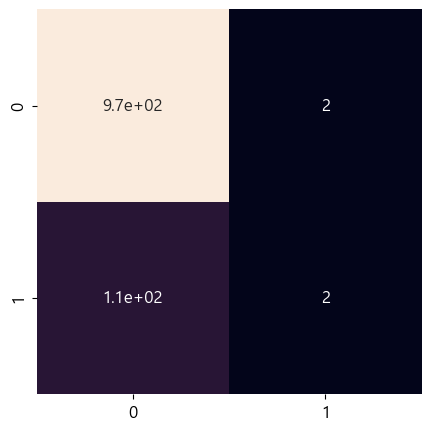

In [112]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbarÎ•º ÌÜµÌï¥ colorbarÏùò Ïú†Î¨¥Î•º Ï†ïÌï¥ Ï§Ñ Ïàò ÏûàÍ≥†
# linewidths Í∞Å cellÎßàÎã§ ÏÑ†ÏùÑ ÎÑ£Ïñ¥Ï£ºÍ≥† ÍµµÍ∏∞Î•º Ï†ïÌï† Ïàò ÏûàÎã§.
# annot Í∞Å cellÏùò Í∞íÏùÑ ÌëúÍ∏∞Ìï† Ïàò ÏûàÎã§. Ïù¥Îïå fmtÎ•º Ïù¥Ïö©Ìï¥ Í∞Å cell Í∞íÏùò Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÎ•º ÏßÄÏ†ïÌï¥Ï£ºÎäî Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌï† Ïàò ÏûàÎã§.
# vmin, vmaxÎ°ú ÏÉâÏúºÎ°ú ÏµúÎåÄÍ∞í, ÏµúÏÜåÍ∞íÏùÑ ÌëúÌòÑÌï† Ïàò ÏûàÎã§. ex) vmin = 200, vmax=500
plt.show()

In [113]:
x_tr.head()

income  gen_2  health_state_2  health_state_3  health_state_4  \
1498  8.397734      1               1               0               0   
2382  8.350902      0               0               0               1   
2071  8.597667      0               0               0               0   
2878  8.971448      1               0               0               1   
3291  8.911665      1               0               0               0   

      health_state_5  disabled_2  work_state_2  
1498               0           1             0  
2382               0           1             0  
2071               1           1             1  
2878               0           1             0  
3291               1           1             0

In [114]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'disabled_2', 'work_state_2'],
      dtype='object')

In [115]:
# ÌèâÍ∞ÄÏßÄÌëú
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.9003
Precision:0.5000
recall:0.0185
F1:0.0357
roc_auc:0.5082


In [116]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

In [117]:
model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.270277
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4322
Method:                           MLE   Df Model:                            8
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.1342
Time:                        11:49:17   Log-Likelihood:                -1170.6
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 1.690e-73
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0250      0.654      4.625      0.000       1.743       4.307
x_tr[x_col][0]    -0.4723      0.072     -6.517      0.000      -0.614      -0.330
x_tr[x_col][1]     0.6266      0.120      5.210      0.000       0.391       0.862
x_tr[x_col][2]    -0.7368      0.311     -2.366      0.018      -1.347      -0.126
x_tr[x_col][3]    -1.5104      0.318     -4.745      0.000      -2.134      -0.886
x_tr[x_col][4]    -2.1006      0.317     -6.637      0.000      -2.721      -1.480
x_tr[x_col][5]    -2.0075      0.371     -5.411      0.000      -2.735      -1.280
x_tr[x_col][6]    -0.2676      0.185     -1.449      0.147      -0.630       0.094
x_tr[x_col][7]     0.4849      0.116      4.178      0.000       0.257       0.712
==================================================================================
"""

In [118]:
pd.DataFrame({'Ïª¨Îüº': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept') 

Ïª¨Îüº        VIF
0  x_tr[x_col][0]   1.199065
1  x_tr[x_col][1]   1.055692
2  x_tr[x_col][2]   9.875267
3  x_tr[x_col][3]  13.996094
4  x_tr[x_col][4]  22.058178
5  x_tr[x_col][5]   9.200867
6  x_tr[x_col][6]   1.088761
7  x_tr[x_col][7]   1.118205

In [119]:
# 2Ï∞® Îã§Ìï≠Ïãù Î≥ÄÌôò
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("ÏõêÎ≥∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÖã:", x_train.shape) # 2Í∞úÏù∏ Ïù¥Ïú† LATST, RM Ïù¥ ÎëêÍ∞ÄÏßÄ Í∞íÏùÑ Í∞ÄÏßÄÍ∏∞ ÎïåÎ¨∏Ïù¥Í≥†
print("2Ï∞® Îã§Ìï≠Ïãù Î≥ÄÌôò Îç∞Ïù¥ÌÑ∞ ÏÖã:", x_train_poly.shape) # Í∞Å ÌîºÏ≤òÏóê ÎåÄÌïú 2Ï∞®Ìï≠Ïù¥ Ï∂îÍ∞Ä ÎêòÏñ¥ ÌîºÏ≤òÍ∞úÏàòÍ∞Ä ÎäòÏñ¥ÎÇúÎã§.
# print(x_train_poly)
# print(x_train)
# Îç∞Ïù¥ÌÑ∞ ÏÖãÏù¥ 6Í∞úÏù∏ Í≤ΩÏö∞ Í∞ÅÍ∞ÅÏùò ÎØ∏ÏßÄÏàòÏùò Í∞íÏùÑ a0, a1, a2Î°ú ÎÇòÎà†ÎÜ®Í≥†
# Í∑∏Í≤ÉÏùÑ ÎØ∏Î∂ÑÌïòÏó¨ 0Ïù¥ÎêòÎäî Í≤ÉÏùÑ Ï∞æÍ∏∞ ÏúÑÌïòÏó¨ Ï†úÍ≥±, Î∞è Îã§ÏñëÌïú ÌòïÌÉúÎ°ú ÏÉàÎ°≠Í≤å
# ÏùºÏ†ïÌïòÍ≤å ÏàòÎ•º Í∑úÏ°çÌñàÍ∏∞ ÎïåÎ¨∏
# print(x_train_poly)

NameError: name 'x_train' is not defined